#### Can you predict heartdisease in patients using only their vitals data?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [2]:
Hrtdisese=pd.read_csv("C:/Users/kulka/AnacondaJunior/HW3/heart_disease.csv")
Hrtdisese.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
Hrtdisese.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
Hrtdisese.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


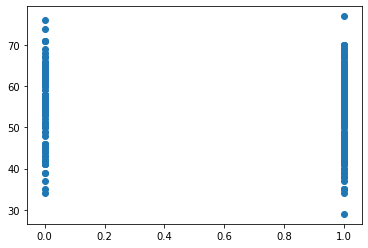

In [5]:
X=Hrtdisese.loc[:,['sex']]
y=Hrtdisese.loc[:,['age']]

plt.scatter(X,y)

In [6]:
#Looking into variables that might affect teh probabilty of get heart dieseases after a certain age
x1=Hrtdisese.loc[:,['age']]
x2=Hrtdisese.loc[:,['trestbps']]
x3=Hrtdisese.loc[:,['chol']]

In [7]:
x1.head()

,age
0,63
1,37
2,41
3,56
4,57


In [8]:
# Creating indexes to get numberes meeting this criteres and then creating new rows to calssify as "Dangerous levels"
indexes1=x1[x1["age"] > 61].index
Hrtdisese["Danger_Age"]=x1[x1['age']>65]
Hrtdisese.fillna(Hrtdisese.mean(), inplace=True)

indexes2 = x2[x2["trestbps"] >= 100].index
Hrtdisese["Danger_trestbps"]=x2[x2['trestbps']>65]
Hrtdisese.fillna(Hrtdisese.mean(), inplace=True)

indexes3 = x3[x3["chol"] >= 100].index
Hrtdisese["Danger_chol"]=x3[x3['chol']>190]
Hrtdisese.fillna(Hrtdisese.mean(), inplace=True)

Hrtdisese.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Danger_Age,Danger_trestbps,Danger_chol
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,68.606061,145,233.0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,68.606061,130,250.0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,68.606061,130,204.0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,68.606061,120,236.0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,68.606061,120,354.0


In [9]:
#We are running Decision Tree between the two x variables and comparing it to Danger_age to see if 

X=Hrtdisese.iloc[:,[3,4]]
y=Hrtdisese.iloc[:,[14]]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

from sklearn.tree import DecisionTreeRegressor
DTHrtdisese=DecisionTreeRegressor(max_leaf_nodes=400,random_state=1)

DTHrtdisese.fit(X_train,y_train)

y_test_pred=DTHrtdisese.predict(X_test)

mae = mean_absolute_error(y_test,y_test_pred)

print(mae)

0.21659215101839438


In [10]:
# We are running a Decision tree between the tw0 x variables and comparing it to Danger_trestbps
X=Hrtdisese.iloc[:,[0,4]]
y=Hrtdisese.iloc[:,[15]]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

from sklearn.tree import DecisionTreeRegressor
DTHrtdisese=DecisionTreeRegressor(max_leaf_nodes=400,random_state=1)

DTHrtdisese.fit(X_train,y_train)

y_test_pred=DTHrtdisese.predict(X_test)

mae = mean_absolute_error(y_test,y_test_pred)

print(mae)

18.360655737704917


In [11]:
# We are running a Decision tree between the two x variables and comparing it to Danger_Chol
X=Hrtdisese.iloc[:,[3,0]]
y=Hrtdisese.iloc[:,[16]]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

from sklearn.tree import DecisionTreeRegressor
DTHrtdisese=DecisionTreeRegressor(max_leaf_nodes=400,random_state=1)

DTHrtdisese.fit(X_train,y_train)

y_test_pred=DTHrtdisese.predict(X_test)

mae = mean_absolute_error(y_test,y_test_pred)

print(mae)

41.800990059080924


In [12]:
X=Hrtdisese.iloc[:,[3,4]]
y=Hrtdisese.iloc[:,[14]]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

from sklearn.ensemble import RandomForestRegressor
RFHrtdisese = RandomForestRegressor(max_leaf_nodes=40,random_state=1,n_estimators=800, max_features=0.25)
RFHrtdisese.fit(X_train,y_train)

y_test_pred=RFHrtdisese.predict(X_test)

mae=mean_absolute_error(y_test,y_test_pred)

print(mae)

C:\Users\kulka\OneDrive\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.36946413813396434


In [13]:
X=Hrtdisese.iloc[:,[0,4]]
y=Hrtdisese.iloc[:,[15]]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

from sklearn.ensemble import RandomForestRegressor
RFHrtdisese = RandomForestRegressor(max_leaf_nodes=40,random_state=1,n_estimators=800, max_features=0.25)
RFHrtdisese.fit(X_train,y_train)

y_test_pred=RFHrtdisese.predict(X_test)

mae=mean_absolute_error(y_test,y_test_pred)

print(mae)


C:\Users\kulka\OneDrive\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


13.580392916000553


In [14]:
X=Hrtdisese.iloc[:,[3,0]]
y=Hrtdisese.iloc[:,[16]]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

from sklearn.ensemble import RandomForestRegressor
RFHrtdisese = RandomForestRegressor(max_leaf_nodes=40,random_state=1,n_estimators=800, max_features=0.25)
RFHrtdisese.fit(X_train,y_train)

y_test_pred=RFHrtdisese.predict(X_test)

mae=mean_absolute_error(y_test,y_test_pred)

print(mae)

C:\Users\kulka\OneDrive\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


34.878074186018786
